In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import warnings # to hide unnecessary warning
warnings.filterwarnings ('ignore')
%matplotlib inline

In [2]:
# Data Understanding

import pandas as pd
import numpy as np

train = pd.read_csv (r"C:\Users\khali\Downloads\cardekho_data.csv")
test = pd.read_csv (r"C:\Users\khali\Downloads\cardekho_data.csv")
train.shape

(301, 9)

(5.5, -0.5)

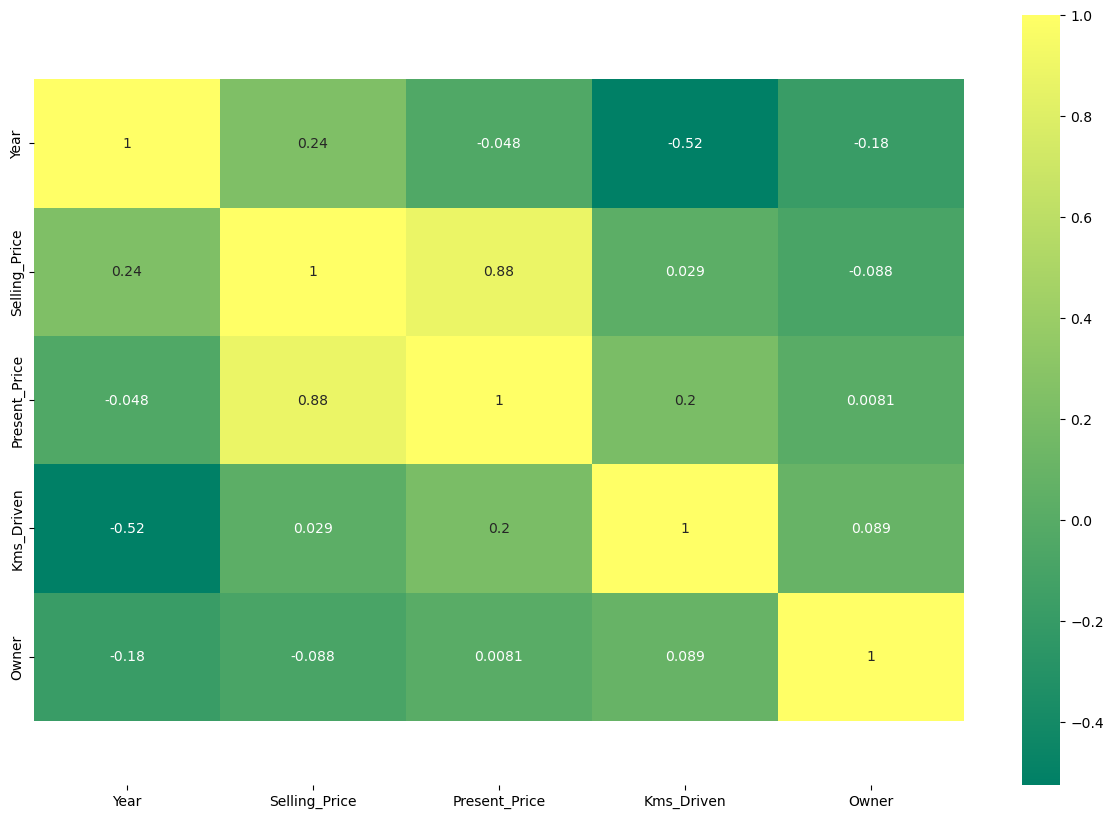

In [3]:
# Correlation Heatmap

import seaborn as sns

# correlations using heat map plot
plt.figure(figsize=(15,10))
ax = sns.heatmap(train.corr(), annot=True, cmap='summer', cbar=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

<AxesSubplot:xlabel='Owner', ylabel='count'>

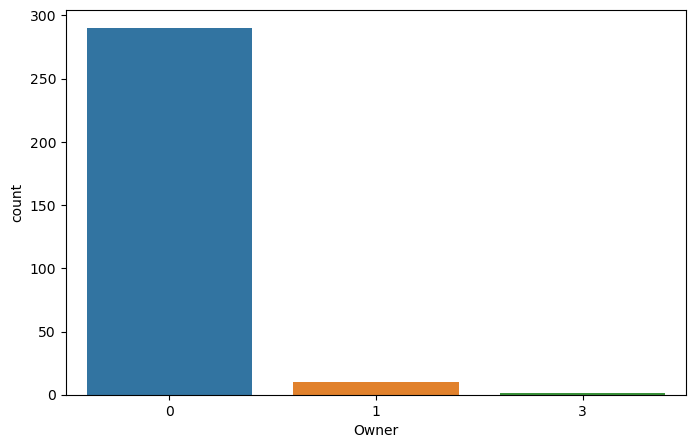

In [4]:
plt.figure(figsize=(8,5))

# count rows of each classes
sns.countplot(x="Owner", data=train)

In [5]:
# Data Preparation

# select all columns except the last one 
x_train = train.iloc [:, :-1]

# set target categorical data label 
y_train = train.iloc [:, 4]


# select all columns except the last one 
x_test = test.iloc [:, :-1]

# set target categorical data label 
y_test = test.iloc [:, 4]


# split train data into train and test subsets
from sklearn.model_selection import train_test_split

# select all columns except the last one 
x = train.iloc [:, :-1]

# set target categorical data label 
y = train.iloc [:, 4]

x_train, x_test, y_train, y_test = train_test_split (x,y,test_size = 0.4, random_state=0)

In [6]:
print ('-------- x axis test --------')
print (x_test)
print ('-------- x axis train --------')
print (x_train)
print ('-------- y axis test --------')
print (y_test)
print ('-------- y axis train --------')
print (y_train)
print ('\n******************************')

-------- x axis test --------
               Car_Name  Year  Selling_Price  Present_Price  Kms_Driven  \
223               verna  2015           8.25          9.400       61381   
150  TVS Apache RTR 180  2011           0.50          0.826        6000   
226           grand i10  2015           5.25          5.700       24678   
296                city  2016           9.50         11.600       33988   
52               innova  2017          18.00         19.770       15000   
..                  ...   ...            ...            ...         ...   
134  TVS Apache RTR 160  2017           0.65          0.810       11800   
208                 i20  2017           7.90          8.100        3435   
60        corolla altis  2013           6.95         18.610       40001   
157   Yamaha FZ S V 2.0  2015           0.48          0.840       23000   
281                city  2006           2.10          7.600       50456   

    Fuel_Type Seller_Type Transmission  
223    Diesel      Dealer   

Cross-validation scores:  [0.26229508 0.35       0.36666667 0.43333333 0.25      ]
Mean cross-validation score:  0.3324590163934426
              precision    recall  f1-score   support

         500       1.00      1.00      1.00         2
        1000       1.00      1.00      1.00         1
        1200       1.00      1.00      1.00         1
        1300       1.00      1.00      1.00         2
        1400       1.00      1.00      1.00         1
        1900       1.00      1.00      1.00         1
        2071       1.00      1.00      1.00         1
        2135       1.00      1.00      1.00         1
        2400       1.00      1.00      1.00         1
        3000       1.00      1.00      1.00         2
        3435       1.00      1.00      1.00         1
        3493       1.00      1.00      1.00         1
        3500       1.00      1.00      1.00         1
        4000       1.00      1.00      1.00         3
        4100       1.00      1.00      1.00         1
   

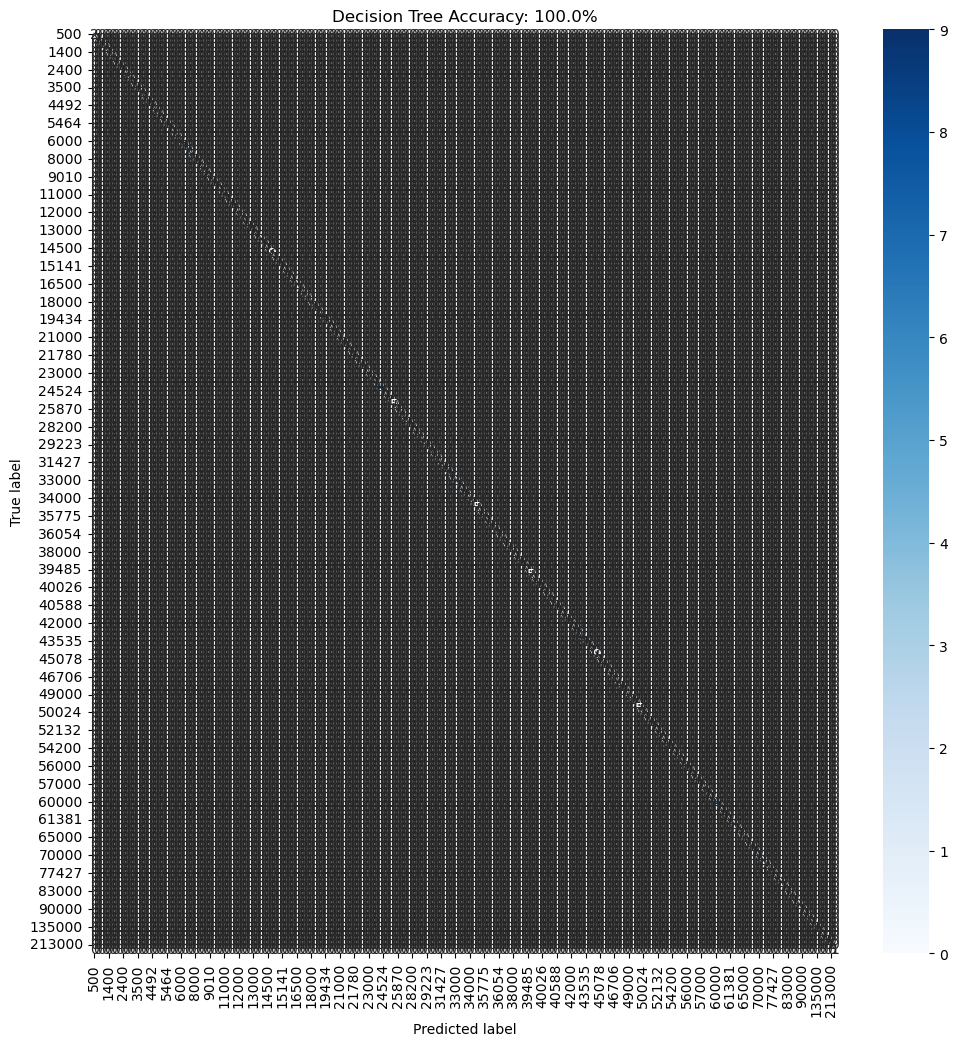

In [7]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score


# Data preprocessing

# Convert categorical data to numeric (one-hot encoding)
x_train = pd.get_dummies(train.iloc[:, :-1])
x_test = pd.get_dummies(test.iloc[:, :-1])

# Ensure the columns in test data match the columns in train data after encoding
x_test = x_test.reindex(columns=x_train.columns, fill_value=0)

# Set target categorical data label  
y_train = train.iloc[:, 4]
y_test = test.iloc[:, 4]

# Train the Decision Tree model
dtree = DecisionTreeClassifier(random_state=0, criterion='entropy')

# Cross-validation to get a better estimate of the model's performance
cv_scores = cross_val_score(dtree, x_train, y_train, cv=5)
print("Cross-validation scores: ", cv_scores)
print("Mean cross-validation score: ", np.mean(cv_scores))

# Fit the model on the full training data
dtree.fit(x_train, y_train)

# Predict the classes of new, unseen data
predict = dtree.predict(x_test)

# Evaluate the model
print(classification_report(y_test, predict))
print("The prediction accuracy is: {0:2.2f}{1:s}".format(dtree.score(x_test, y_test) * 100, "%"))

# Create a confusion matrix
cm = confusion_matrix(y_test, predict)

# Get the unique classes from the target variable
unique_labels = np.unique(y_test)

# Transform to data frame for easier plotting
cm_df = pd.DataFrame(cm, index=unique_labels, columns=unique_labels)

# Plot the confusion matrix
plt.figure(figsize=(12, 12))
ax = sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Decision Tree Accuracy: " + str(dtree.score(x_test, y_test) * 100) + "%")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [9]:
# Number of features in x_train
n_features = x_train.shape[1]
print("Number of features in x_train:", n_features)

# Provided feature names
fn = ["Year", "Selling_Price", "Present_Price", "Kms_Driven", "Owner"]
print("Number of provided feature names:", len(fn))


Number of features in x_train: 109
Number of provided feature names: 5


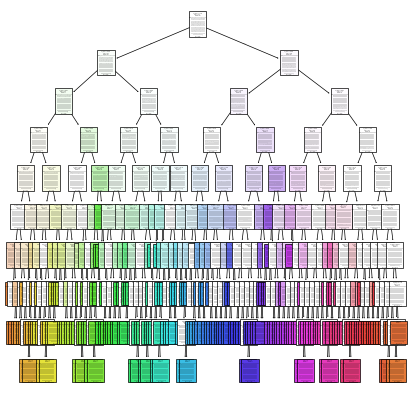

In [10]:
# Plotting The Tree


# Assuming x_train has the correct features
fn = x_train.columns.tolist()  

from sklearn import tree
import matplotlib.pyplot as plt

# Ensure unique classes are captured correctly
unique_classes = np.unique(y_train)
class_names = unique_classes.astype(str)  

# Plot the decision tree
fig, axes = plt.subplots(nrows=1, figsize=(10, 10), dpi=50)
tree.plot_tree(dtree, filled=True, feature_names=fn, class_names=class_names, ax=axes)
plt.show()
